# Reformatting the Excel: Assumptions and stuff
* Copied only vital information for the data generation.
* Everything is in its own cell, so easy to import into a pandas dataframe. 
* Study number five (Jorge, 2015) had measurements for 6- and 12-week checkpoints for Pain, Function and QoL. Only 12 was added to the new excel, since assumedly that is the duration of the treatment/therapy. 
* O'Reilly paper was removed since they reported only the change in QoL, not the actual baseline value. Can't calculate the percentages based on just that.
* Fransen paper has reported the WOMAC scores as inverse, so 0 represents the worst status and 100 the best. Might be that others have done that too 
    * _The WOMAC scores were reverse scored (100 = no pain
or difficulty, 0 = extreme pain or difficulty), so that for all outcome measures higher scores are better scores._ https://www.jrheum.org/content/jrheum/28/1/156.full.pdf (That has been adjusted to the project_excel)




* Group:
    * Used 1 - exercise and 0 - control because it is also using in the objective functions

* No of sessions:
    * Also added because it is using in the objective functions
    * 0 used for control assuming control fact do not have any sessions

* Age:
    * several different "value types" in paranthesis
    * for some there is the +/- notation: not sure what that means. Need to assume something but what?
    * for those cells with input like 71.9 (69.3, 74.6), in the paranthesis seems to be the 95% CI (only checked Cheung paper)
    * for some there is mean (SD) notation used, SD being standard deviation
    * According to the Wallis paper age structure may be Age_Mean_value (Age_SD)
    * According to the Evcik paper the +/- notation follows SD
    * There is a problem with entering decimal numbers. So I replaced . with , and changed the font color in red

* BMI: 
    * same issues as with age


* Study participants/subjects:
    * for simplicity's sake, it was assumed that all participants finished the therapies/participating in the study. (In reality this is not true, but cutting corners here a little bit, this is already getting out of hand)

    * Do we need to keep Male and Female separate?  - _I don't think so. The information is not used in any of the objectives or in the data later, all the numbers are for the genders combined. Ideally, we should take the gender into account, but I think it is just complicating matters at this point. -J_

* Pain levels:
    * only the womac score included
    * unless otherwise mentioned, it was assumed that the score was 0-20
    * notice: not all were in the same scale, so needed to scale
    * WOMAC (35 pain) don't know what this means and can't get access to the article to check so not doing anything to the values
    * 'changes' was interpreted to mean how much the original womac value changed, so the 'after' value would baseline+change.


* Functionality
    * can't get access to check what womac fc 85 means so leaving that as is (since googling didn't help either)

    
* QoL
    * different tests were used to test quality of life. If the scales were same, it was assumemd that they are comparable as is. 
    * everything was scaled to 0-100
    * assuming that NHP emotional reaction is scaled from 0-100
    * should maybe check if all scores are the "same order", like 0 is worst in all and 100 best. (Because for example for NHP: "the total score for each domain is 100 where a score of 0 indicates good subjective health status and 100 indicates poor subjective health status." and I think SF-36 might use the scale the other way, 0 being worst and 100 being best)
        * assuming 100 is the best score and 0 the worst
        * I inversed the last study's QoL scores since they were the wrong way around (0 being the best and 100 worst) 
        * assuming others are OK, since the numbers make sense (they are rising after intervention/with time)
    * Also for one paper there is no values, what should be done with that? (marked in grey) 
        * _This study has been dropped._
    * **In the final report we shouold mention that several different metrics were used and that they might not be comparable**
        * Although in theory, since we are comparing the change (or the percentage of improvement), they might not be that different?


Color coding for the half finished table: 
* pink: need to somehow turn values into standard deviation
* green: need to find out what mm means and turn the value into scores (need to read the source paper)



_TODO: add table columns and explain them_

In [69]:
# %pip install desdeo

# _Week 1:_ Data generation
* Find a method that can generate artificial data based on mean and variance
* If a method cannot be found, need to assume distriubtion
    * Example of normally distributed data generation below (with mean and variance)
    * Compare that to some existing data (if there is such) 
        * if looks good, run with it
        * but what if it does not look good? And if there is existing data, wouldn't it be easier to generate synthetic data based on that? There's ways to generate "anonymous" (synthetic) data from existing patient information, so that no patient confidiality is broken.

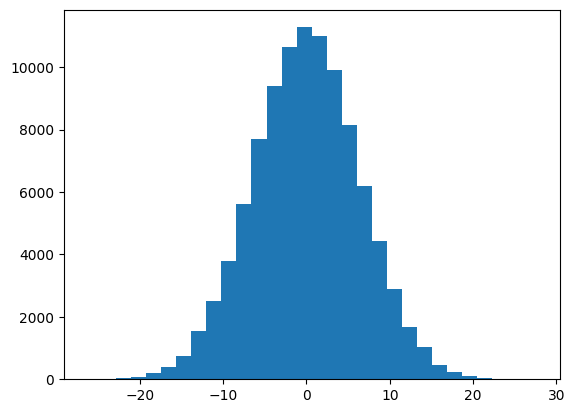

In [70]:
# Just an example on how to generate normally distributed data with mean and variance.

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

# Generating data following the normal distrubution
variance = 40  # just an example value
standard_deviation = sqrt(variance)  # Standard deviation is the square root of the variance
mean = 0 # another example value
n = 100000  # the amount of samples to be generated

values = np.random.normal(mean, standard_deviation, n)

plt.hist(values, bins=30)
plt.show() 

In [71]:
# %pip install openpyxl

## Need to generate data for
* Age 
    * assumption: distribution probably skewed to the older side, since it is knee OA (older people more likely to have it)
    * modeled as normal distribution, should maybe skew it a bit to the older side?
* BMI 
    * Knee osteoarthiritis and bmi connected, could use that information?  https://www.sciencedirect.com/science/article/abs/pii/S1297319X11001370
    * modeled as a normal distribution, should skew it somehow maybe?
* Pain (baseline)
    * modeled as normal distribution for now (same for all the rest - should probably think more)
* Physical Functionality (baseline)
* QoL (baseline)
* Pain (after intervention)
* Physical Functionality (after intervention)
* QoL (after intervention)

In [72]:
# Importing the data
import pandas as pd

# Importing the excel into a dataframe
df = pd.read_excel('project_excel.xlsx', index_col='reference')

## Data generation: normally distributed

All generated data is stored in a dictionary, where the first column in excel (or the df index row) is the key and its value is another dataframe of the form 


{ <br>
        'age': data_age, <br>
        'bmi': data_bmi, <br>
        'patients_num': num_of_participants,<br>
        'pain_before': pain_before_data,<br>
        'pain_after': pain_after_data,<br>
        'functionality_before': func_before_data,<br>
        'functionality_after': func_after_data,<br>
        'QoL_before': qol_before_data,<br>
        'QoL_after': qol_after_data<br>
}


*If we have time to do another version of the data generation, that could probably be done with just copy pasting this version.*



Reminder: 
 * pain on scale 0-20 (0 meaning no pain and being the best value)
    * so pain_after should be assumed to be smaller than pain_before and calculating the percentage as (before-after)/before * 100
 * function 0-68 (0 being the best)
    * percentage calculated as above
 * QoL on scale 0-100, the bigger the better.
    * value is assumed to get higher after intervention/with time, so calculating the percentage as (after-before)/before * 100

*Note: If the percentage values are negative, it means the improvement has been negative.*

In [73]:
# Function that takes the whole column as input, divides it into pairs with the relevant mean and std 
# except the number of participants in the study is just an integer.
# Then generates the data based on the above distributions and returns it in a dictionary 
def generate_data(info):
    age = (info['age_mean'], info['age_std'])
    bmi = (info['bmi_mean'], info['bmi_std'])
    num_of_participants = int(info['num_of_subjects'])
    pain_before = (info['pain_before_mean'], info['pain_before_std'])
    pain_after = (info['pain_after_mean'], info['pain_after_std'])
    func_before = (info['func_before_mean'], info['func_before_std'])
    func_after = (info['func_after_mean'], info['func_after_std'])
    qol_before = (info['QoL_before_mean'], info['QoL_before_std'])
    qol_after = (info['QoL_after_mean'], info['QoL_after_std'])

    # Generating the data
    data_age = np.random.normal(age[0], age[1], num_of_participants)
    data_bmi = np.random.normal(bmi[0], bmi[1], num_of_participants)
    pain_before_data = np.random.normal(pain_before[0], pain_before[1], num_of_participants)
    pain_after_data = np.random.normal(pain_after[0], pain_after[1], num_of_participants)
    func_before_data = np.random.normal(func_before[0], func_before[1], num_of_participants)
    func_after_data = np.random.normal(func_after[0], func_after[1], num_of_participants)
    qol_before_data = np.random.normal(qol_before[0], qol_before[1], num_of_participants)
    qol_after_data = np.random.normal(qol_after[0], qol_after[1], num_of_participants)

    # Calculating the improvement percent for each patient (pain, function and QoL)
    pain_improvement = (pain_before_data - pain_after_data)/pain_before_data * 100
    func_improvement = (func_before_data - func_after_data)/func_before_data * 100
    qol_improvement = (qol_after_data - qol_before_data)/qol_before_data * 100

    return {
        'age': data_age,
        'bmi': data_bmi,
        'patients_num': num_of_participants,
        'pain_before': pain_before_data,
        'pain_after': pain_after_data,
        'pain_improvement': pain_improvement,
        'func_before': func_before_data,
        'func_after': func_after_data,
        'func_improvement': func_improvement,
        'QoL_before': qol_before_data,
        'QoL_after': qol_after_data,
        'QoL_improvement': qol_improvement
    }
    

In [74]:
# A function for creating csv files for each exercise and control group
import csv
import os

def write_to_csv(data, filename, folder):
    os.makedirs(folder, exist_ok=True)
    filepath = os.path.join(folder, filename)

    with open(filepath, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['age', 'bmi', 'pain_before', 'pain_after', 'pain_improvement',
                         'func_before', 'func_after', 'func_improvement', 'QoL_before', 'QoL_after', 'QoL_improvement'])
    
        for i in range(data['patients_num']):
            writer.writerow([data['age'][i], data['bmi'][i], 
                             data['pain_before'][i], data['pain_after'][i], data['pain_improvement'][i], 
                             data['func_before'][i], data['func_after'][i], data['func_improvement'][i], 
                             data['QoL_before'][i], data['QoL_after'][i], data['QoL_improvement'][i]])


In [75]:
# This piece of code generates the data. Now commented because it obviously overwrites the csv files each run
# and we do not wish to do that each time. 
# TODO: At some point, need to make better data because this one will not work well. (See PROBLEMS below)

# This is the folder where the data is stuffed. The folder doesn't have to exist, 
# if it does not exist, the folder will be created
folder = 'data_initial'

synthetic_data_dict = {} # Storing all generated data here
for index, row in df.iterrows():
    # Generating data for each row in the df and adding that to the dict with the row index being the key
    synthetic_data_dict[index] = generate_data(row)
    filename = f"data_{index}.csv"
    write_to_csv(synthetic_data_dict[index], filename, folder)

# <span style="color:red">PROBLEMS</span>
* Negative values in the objective function datas, that should not be allowed to happen since the values aren't realistic.
* Improvement rates are bloody ridiculous, they are not realistic at all. I think it is because of the negative values in the data, they are messing with the improvement calculations. Need to weed out the negative values and perhaps introduce some sort of correlation between the before and after levels.

In [76]:
# Importing the data from csv files into dataframes

# _Week 2:_ Surrogates

*Should probably choose at least 2, maybe even 3 or 4 and do some analysis on those so we can find out which works the best.*
- Chosen surrogates for further evaluation and testing:
    - SVM 
    - 
    -
    

# _Week 3:_ Problem formulation 

### Preferences provided by the DM 
Acceptable minimum and maximum ranges for the objectives

| |Costs (€) | Pain change (%) | Function change (%) | Supervised sessions | Period (weeks) |
| -------|------------|------------------|----------------------|----------------------|----------------|
| Iteration 1 | 300 | +30% | +25% | 0 | 8 |
| | 600 | +15% | +15% | 15 | 26 |
| Iteration 2  | 200 | +25% | +40% | 0 | 12 |
| | 500 | +15% | +15% | 30 | 26 |
